Step-2-Data Cleaning & Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/raw/KaggleV2-May-2016.csv')
df


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
# FIX DATES
print(df[['ScheduledDay', 'AppointmentDay']].head())

# Convert text to dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

print(df[['ScheduledDay', 'AppointmentDay']].head())

           ScheduledDay        AppointmentDay
0  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z
1  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z
2  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z
3  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z
4  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z
               ScheduledDay            AppointmentDay
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00
1 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00
2 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00
3 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00
4 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00


In [4]:
#FIX AGE PROBLEMS
print(f"   Minimum age: {df['Age'].min()} This is wrong! (negative age)")
print(f"   Maximum age: {df['Age'].max()} This is wrong! (too old)")

   Minimum age: -1 This is wrong! (negative age)
   Maximum age: 115 This is wrong! (too old)


In [5]:
# Remove people with negative age (data error)
df = df[df['Age'] >= 0]
print(f"After removing negative ages: {len(df)} people")

# Change ages over 100 to 100 (probably data entry error)
df.loc[df['Age'] > 100, 'Age'] = 100

print(f"\nNow age range is: {df['Age'].min()} to {df['Age'].max()}")

After removing negative ages: 110526 people

Now age range is: 0 to 100


In [6]:
# CREATE NEW FEATURES 
# FEATURE 1: How many days before did they book?
# Calculate the difference
df['DaysInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

print(f" Shortest: {df['DaysInAdvance'].min()} days (same day booking)")
print(f" Longest: {df['DaysInAdvance'].max()} days")
print(f" Average: {df['DaysInAdvance'].mean()} days")

print(df[['ScheduledDay', 'AppointmentDay', 'DaysInAdvance']].head())

 Shortest: -7 days (same day booking)
 Longest: 178 days
 Average: 9.183793858458642 days
               ScheduledDay            AppointmentDay  DaysInAdvance
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00             -1
1 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00             -1
2 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00             -1
3 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00             -1
4 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00             -1


In [7]:
# FEATURE 2: What day of the week?
# # Get day name
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

print("\n How many appointments each day:")
print(df['DayOfWeek'].value_counts())
print("\n Example:")
print(df[['AppointmentDay', 'DayOfWeek']].head(10))


 How many appointments each day:
DayOfWeek
Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: count, dtype: int64

 Example:
             AppointmentDay DayOfWeek
0 2016-04-29 00:00:00+00:00    Friday
1 2016-04-29 00:00:00+00:00    Friday
2 2016-04-29 00:00:00+00:00    Friday
3 2016-04-29 00:00:00+00:00    Friday
4 2016-04-29 00:00:00+00:00    Friday
5 2016-04-29 00:00:00+00:00    Friday
6 2016-04-29 00:00:00+00:00    Friday
7 2016-04-29 00:00:00+00:00    Friday
8 2016-04-29 00:00:00+00:00    Friday
9 2016-04-29 00:00:00+00:00    Friday


In [8]:
# FEATURE 3: Age Group
# Create simple function
def get_age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply to everyone
df['AgeGroup'] = df['Age'].apply(get_age_group)

print("\n  How many in each group:")
print(df['AgeGroup'].value_counts())

print("\n   Example:")
print(df[['Age', 'AgeGroup']].head(10))



  How many in each group:
AgeGroup
Adult     61974
Child     27379
Senior    21173
Name: count, dtype: int64

   Example:
   Age AgeGroup
0   62   Senior
1   56    Adult
2   62   Senior
3    8    Child
4   56    Adult
5   76   Senior
6   23    Adult
7   39    Adult
8   21    Adult
9   19    Adult


In [9]:
# FEATURE 4: Is it a Weekend?
# Get day number (0=Monday, 6=Sunday)
day_number = df['AppointmentDay'].dt.dayofweek

# If day is 5 or 6 (Saturday/Sunday), mark as weekend
df['IsWeekend'] = day_number.isin([5, 6]).astype(int)

print(f"\n  Weekday appointments: {(df['IsWeekend'] == 0).sum():,}")
print(f"  Weekend appointments: {(df['IsWeekend'] == 1).sum():,}")

print("\n   Example:")
print(df[['AppointmentDay', 'DayOfWeek', 'IsWeekend']].head(10))


  Weekday appointments: 110,487
  Weekend appointments: 39

   Example:
             AppointmentDay DayOfWeek  IsWeekend
0 2016-04-29 00:00:00+00:00    Friday          0
1 2016-04-29 00:00:00+00:00    Friday          0
2 2016-04-29 00:00:00+00:00    Friday          0
3 2016-04-29 00:00:00+00:00    Friday          0
4 2016-04-29 00:00:00+00:00    Friday          0
5 2016-04-29 00:00:00+00:00    Friday          0
6 2016-04-29 00:00:00+00:00    Friday          0
7 2016-04-29 00:00:00+00:00    Friday          0
8 2016-04-29 00:00:00+00:00    Friday          0
9 2016-04-29 00:00:00+00:00    Friday          0


In [10]:
# FEATURE 5: Convert No-show to 0 and 1
# 0 = showed up, 1 = missed
df['NoShow_Binary'] = (df['No-show'] == 'Yes').astype(int)

print(df[['No-show', 'NoShow_Binary']].head(10))

print(f"\n   Showed up (0): {(df['NoShow_Binary'] == 0).sum():,}")
print(f"   Missed (1): {(df['NoShow_Binary'] == 1).sum():,}")

  No-show  NoShow_Binary
0      No              0
1      No              0
2      No              0
3      No              0
4      No              0
5      No              0
6     Yes              1
7     Yes              1
8      No              0
9      No              0

   Showed up (0): 88,207
   Missed (1): 22,319


In [13]:
# Does booking in advance affect no-shows?
# Group by how far in advance they booked
same_day = df[df['DaysInAdvance'] == 0]
one_week = df[df['DaysInAdvance'].between(1, 7)]
one_month = df[df['DaysInAdvance'].between(8, 30)]
long_time = df[df['DaysInAdvance'] > 30]

print(f"\n Same day booking: {same_day['NoShow_Binary'].mean()*100:.1f}% no-show")
print(f"   1 week advance: {one_week['NoShow_Binary'].mean()*100:.1f}% no-show")
print(f"   1 month advance: {one_month['NoShow_Binary'].mean()*100:.1f}% no-show")
print(f"   More than 1 month: {long_time['NoShow_Binary'].mean()*100:.1f}% no-show")

print("\n  INSIGHT: The longer they wait, the more likely they forget")


 Same day booking: 21.4% no-show
   1 week advance: 25.0% no-show
   1 month advance: 32.0% no-show
   More than 1 month: 33.0% no-show

  INSIGHT: The longer they wait, the more likely they forget


In [14]:
# Does SMS reminder help?
no_sms = df[df['SMS_received'] == 0]
got_sms = df[df['SMS_received'] == 1]

no_sms_rate = no_sms['NoShow_Binary'].mean() * 100
got_sms_rate = got_sms['NoShow_Binary'].mean() * 100

print(f"\n   No SMS: {no_sms_rate:.1f}% no-show")
print(f"   Got SMS: {got_sms_rate:.1f}% no-show")
print(f"\n  INSIGHT: SMS reduces no-shows by {no_sms_rate - got_sms_rate:.1f}%!")


   No SMS: 16.7% no-show
   Got SMS: 27.6% no-show

  INSIGHT: SMS reduces no-shows by -10.9%!


In [15]:
# Does age matter?
for age_group in ['Child', 'Adult', 'Senior']:
    group_data = df[df['AgeGroup'] == age_group]
    noshow_rate = group_data['NoShow_Binary'].mean() * 100
    print(f"   {age_group}: {noshow_rate:.1f}% no-show")

   Child: 21.9% no-show
   Adult: 21.1% no-show
   Senior: 15.3% no-show


In [16]:
# Does day of week matter?
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
    day_data = df[df['DayOfWeek'] == day]
    if len(day_data) > 0:
        noshow_rate = day_data['NoShow_Binary'].mean() * 100
        print(f"   {day}: {noshow_rate:.1f}% no-show")

   Monday: 20.6% no-show
   Tuesday: 20.1% no-show
   Wednesday: 19.7% no-show
   Thursday: 19.4% no-show
   Friday: 21.2% no-show


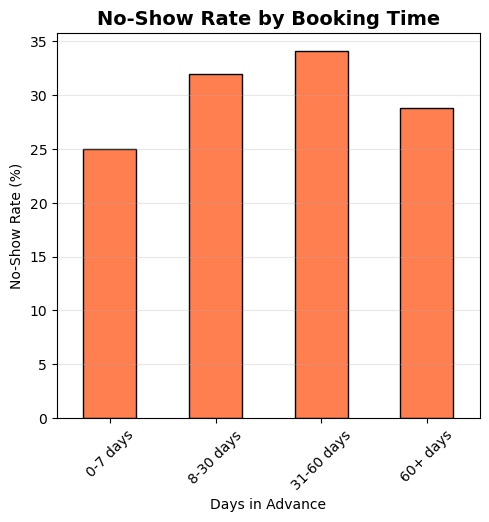

In [17]:
# PART 6: CREATE SIMPLE CHARTS
# Chart 1: No-show by Days in Advance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Group into bins
bins = [0, 7, 30, 60, 200]
labels = ['0-7 days', '8-30 days', '31-60 days', '60+ days']
df['DaysBin'] = pd.cut(df['DaysInAdvance'], bins=bins, labels=labels)

# Calculate no-show rate for each bin
noshow_by_bin = df.groupby('DaysBin')['NoShow_Binary'].mean() * 100

noshow_by_bin.plot(kind='bar', color='coral', edgecolor='black')
plt.title('No-Show Rate by Booking Time', fontweight='bold', fontsize=14)
plt.xlabel('Days in Advance')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

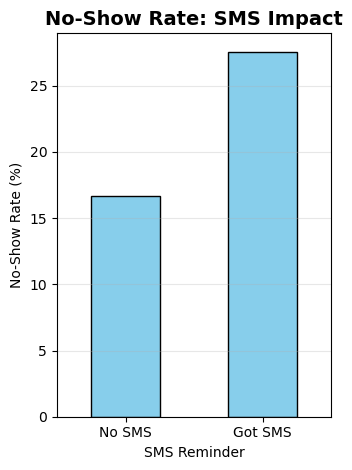

In [18]:
# Chart 2: No-show by SMS
plt.subplot(1, 2, 2)
sms_noshow = df.groupby('SMS_received')['NoShow_Binary'].mean() * 100
sms_noshow.index = ['No SMS', 'Got SMS']

sms_noshow.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('No-Show Rate: SMS Impact', fontweight='bold', fontsize=14)
plt.xlabel('SMS Reminder')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/02_simple_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Save the cleaned data
df.to_csv('../data/processed/cleaned_data.csv', index=False)
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")

   Rows: 110,526
   Columns: 20
